In [1]:
import numpy as np
from scipy.integrate import trapz
from scipy.stats import gamma
from scipy.stats import levy
import matplotlib.pyplot as plt

In [2]:
x_vec = np.linspace(-1, 10, 1000)

In [3]:
def uniform(x, a, b):
    const = 1/(b-a)
    mask = (a <= x) & (x <= b)
    p_x = np.zeros_like(x)
    p_x[mask] = const
    return p_x

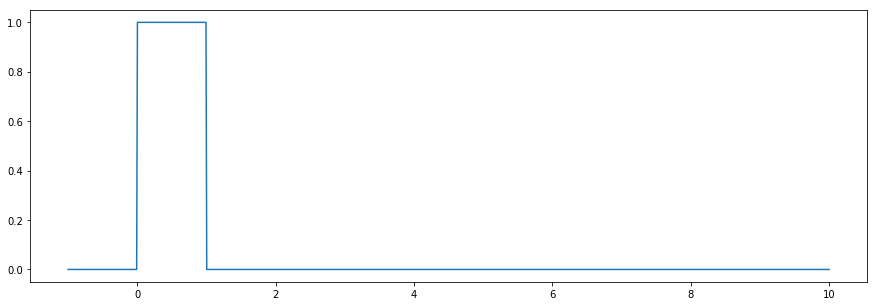

In [4]:
plt.figure(figsize=(15,5))
plt.plot(x_vec, uniform(x_vec, 0, 1))

In [5]:
delta_step = 0.01
x_vec = np.arange(0, 10, delta_step)
u1 = uniform(x_vec, 0, 1)
u2 = uniform(x_vec, 0, 1)
res = delta_step*np.convolve(u1, u2, mode="full")
n = x_vec.size
res = res[0:n]

In [6]:
u1.max()

1.0

In [7]:
res.max()

1.01

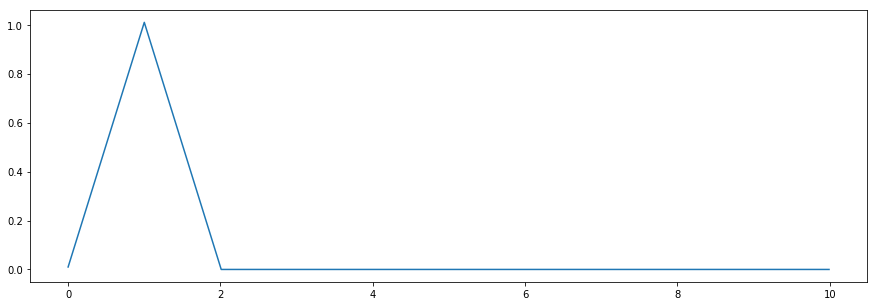

In [8]:
plt.figure(figsize=(15,5))
plt.plot(x_vec, res)

In [9]:
delta_step = 0.001
x_vec = np.arange(0, 100, delta_step)
u = uniform(x_vec, 0, 1)
#u = gamma.pdf(x_vec, a=0.05, scale=1)
#u = levy.pdf(x_vec, scale=0.001)

1.0


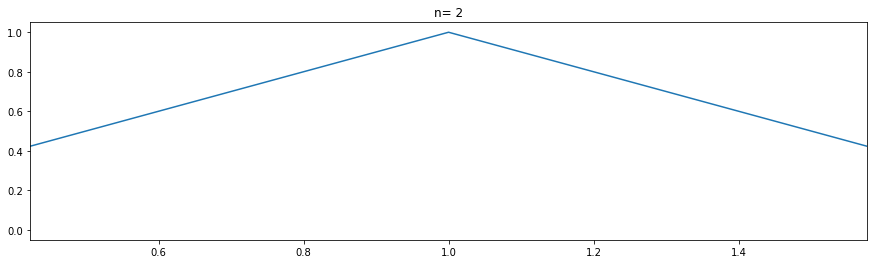

1.0


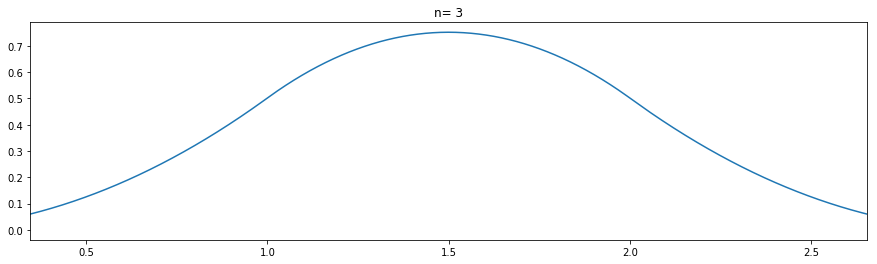

1.0


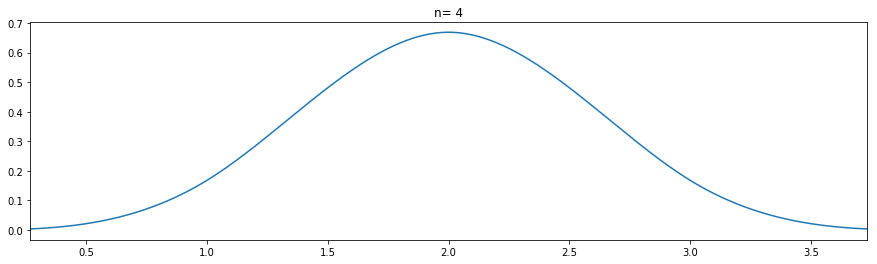

1.0


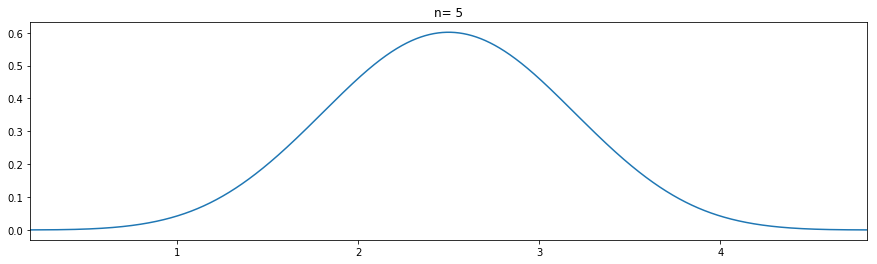

1.0


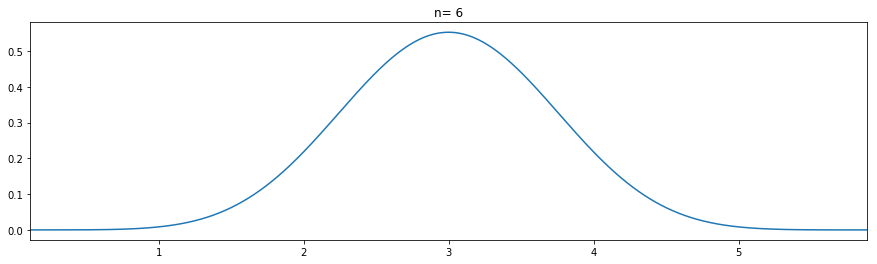

1.0


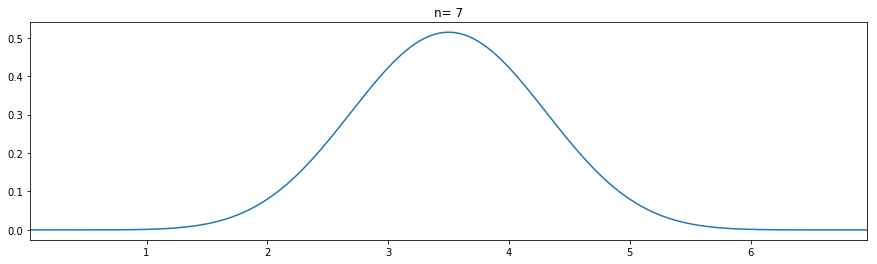

1.0


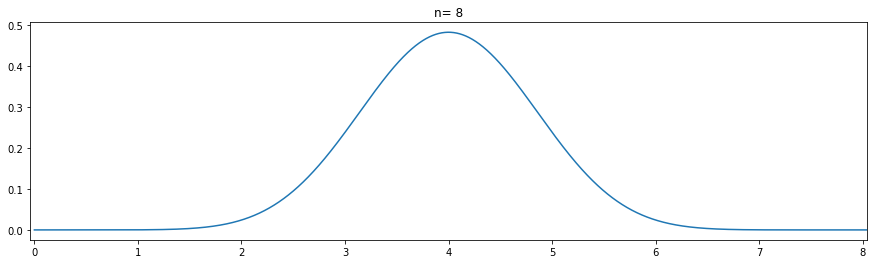

1.0


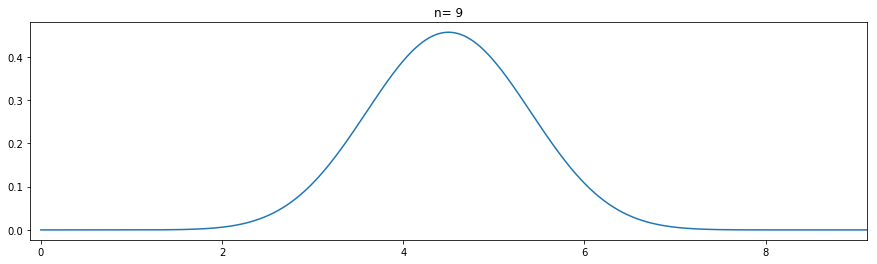

1.0


KeyboardInterrupt: 

In [10]:
iterations = 50
res = u.copy()
for i in range(iterations):
    print(u.max())
    res = delta_step*np.convolve(res, u, mode="full")
    
    n = x_vec.size
    res = res[0:n]
    plt.figure(figsize=(15,4))
    plt.title("n=%2d"%(i+2))
    plt.plot(x_vec, res)
    x_max = x_vec[np.argmax(res)]
    
    sigma = (i+1)*1/np.sqrt(12)
    plt.xlim([x_max-2*sigma, x_max+2*sigma])
    plt.show()

# Visualize

In [88]:
from scipy.integrate import trapz, cumtrapz

In [101]:
x_vec = np.linspace(-10, 10, 1000)
px = uniform(x_vec, 0, 1)

In [102]:
from ipywidgets import interact, fixed, widgets

In [106]:
def p_Z(z, x_vec, px):
    py = uniform(x_vec, 0, 1)
    py_shifted = uniform(z-x_vec, 0, 1)
    a_x = np.multiply(px, py_shifted)
    i_z = trapz(a_x, x_vec)
    
    delta_step = np.diff(x_vec)[0]
    res = delta_step*np.convolve(px, py, mode="full")
    n = x_vec.size
    res = res[n//2:(n+n//2)]
    
    z_idx = np.argmax(x_vec>z)
    area_under_a_z = x_vec[:z_idx]
    area_under_a = res[:z_idx]
    
    # figure
    plt.figure(figsize=(10, 5))
    plt.plot(x_vec, px, ls="-", color="b", label="$p_X(x)$")
    plt.plot(x_vec, py_shifted, ls="-", color="r", label="$p_Y(x)$")
    plt.fill_between(x_vec, 0, a_x, hatch="/", facecolor='yellow', label="$\int p_X(τ)p_Y(z-τ)$")
    plt.plot(area_under_a_z, area_under_a, color="k", label="$p_X(x)*p_Y(x)$", lw=3)
    plt.xlim([-10, 10])
    plt.xlabel("x")
    plt.yticks([], [])
    plt.legend(loc=1)
    return res

In [107]:
import imageio
from PIL import Image
import io

In [108]:
N = 4
eval_positions = np.arange(-1, 9, 0.1)
x_vec = np.linspace(-10, 10, 1000)
px = uniform(x_vec, 0, 1)

with imageio.get_writer('res.mp4', format='FFMPEG', mode='I', fps=25) as w:

    for n in range(N):
        for i, z in enumerate(np.nditer(eval_positions)):
            _ = p_Z(z, x_vec, px)
            plt.title("$%dX$"%(n+2))

            buf = io.BytesIO()
            plt.savefig(buf, format='png')
            buf.seek(0)
            im = Image.open(buf)
            w.append_data(np.array(im))
            plt.close()
            buf.close()
        px = p_Z(z, x_vec, px);
        plt.close()

IMAGEIO FFMPEG_WRITER WARNING: input image is not divisible by macro_block_size=16, resizing from (720, 360) to (720, 368) to ensure video compatibility with most codecs and players. To prevent resizing, make your input image divisible by the macro_block_size or set the macro_block_size to 1 (risking incompatibility).


In [ ]:
!ffmpeg -i central/img%03d.png -c:v libx264 -vf fps=25 -pix_fmt yuv420p out.mp4

In [ ]:
!magick convert central/*.png test.gif

In [ ]:
moviewriter = ImageMagickWriter(fps=25)
n=100
moviewriter.setup(fig=fig, outfile='my_movie.gif', dpi=100)
for j in range(n):
    update(n)
    moviewriter.grab_frame()
moviewriter.finish()